In [112]:
! pip install fastcluster

In [7]:
import os
import sys
from os.path import dirname, realpath, join
base_dir = dirname(dirname(os.getcwd()))
sys.path.insert(0, base_dir)
from config_path import PROSTATE_DATA_PATH, PLOTS_PATH


In [42]:
import pandas as pd
import numpy as np
from os.path import join
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
base_dir = PROSTATE_DATA_PATH

In [10]:
base_dir

'/Users/haithamelmarakeby/PycharmProjects/pnet2/_database/prostate'

In [11]:
def get_ids(sheet_name):
    samples_filename = 'Data S5 sample Identifiers.xlsx'
    df = pd.read_excel(samples_filename, sheet_name=sheet_name, index_col=0)
    return df

In [12]:
PRAD_samples = get_ids('external_val_primary')
mets_samples = get_ids('external_val_mets')
test_samples = get_ids('Testing')
train_samples = get_ids('Training')
valid_samples = get_ids('Internal validation')

In [13]:
p1000_filename =  join(base_dir,'processed/P1000_final_analysis_set_cross_important_only.csv')
p1000_mut = pd.read_csv(p1000_filename, index_col=0)



In [14]:
p1000_mut.shape

(1011, 14378)

In [15]:
ind = p1000_mut.index.isin(test_samples.index)
test_mut = p1000_mut[ind]

In [16]:
ind = p1000_mut.index.isin(valid_samples.index)
valid_mut = p1000_mut[ind]

In [17]:
ind = p1000_mut.index.isin(train_samples.index)
train_mut = p1000_mut[ind]

In [18]:
PRAD_filename =  join(base_dir,'external_validation/PRAD/mut_matrix.csv')
PRAD_mut = pd.read_csv(PRAD_filename, index_col=0)
ind = PRAD_mut.index.isin(PRAD_samples.index)
PRAD_mut = PRAD_mut[ind]

In [19]:
mets_filename= join(base_dir,'external_validation/Met500/Met500_mut_matrix.csv')
mets_mut=pd.read_csv(mets_filename, index_col=0)
mets_mut.index = mets_mut.index.str.split('.', 1).str[0]

In [20]:
ind = mets_mut.index.isin(mets_samples.index)
mets_mut = mets_mut[ind]
mets_mut.fillna(0.0, inplace=True)

In [21]:
mets_mut.shape

(40, 16576)

In [22]:
PRAD_mut.shape

(130, 15005)

In [23]:
frames = [ valid_mut, test_mut, mets_mut, PRAD_mut]
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))


In [24]:
len(common_cols)

9294

In [25]:
data = pd.concat([df[common_cols] for df in frames],  keys=[  'Validation' , 'Test', 'External Vlaidation (mets)', 'External Vlaidation (primary)'])

In [26]:
data.head()

RNF14  RNF17  RNF10  RNF13  REM1  REM2  DUOXA2  \
Validation 00-029N9_LN       0.0    0.0    0.0    0.0   0.0   0.0     0.0   
           04-149E2_LN       0.0    0.0    0.0    0.0   0.0   0.0     0.0   
           05-011G4_LUNG     0.0    0.0    0.0    0.0   0.0   0.0     0.0   
           05-214BB2_BONE    0.0    0.0    0.0    0.0   0.0   0.0     0.0   
           08-006H1_LN       0.0    0.0    0.0    0.0   0.0   0.0     0.0   

                           PMM1  ASS1  ZNF878  ...   PLEKHG1  PLEKHG6  \
Validation 00-029N9_LN      0.0   0.0     0.0  ...       0.0      0.0   
           04-149E2_LN      0.0   0.0     0.0  ...       0.0      0.0   
           05-011G4_LUNG    0.0   0.0     0.0  ...       0.0      0.0   
           05-214BB2_BONE   0.0   0.0     0.0  ...       0.0      0.0   
           08-006H1_LN      0.0   0.0     0.0  ...       0.0      0.0   

                           PLEKHG7  SELK  SLC7A14  SLC7A13  GNGT1  PTRF  NFIX  \
Validation 00-029N9_LN         0.0   0.0      0.0      0.0    0.0   0.0   0.0   
           04-149E2_LN         0.0   0.0      0.0      0.0    0.0   0.0   0.0   
           05-011G4_LUNG       0.0   0.0      0.0      0.0    0.0   0.0   0.0   
           05-214BB2_BONE      0.0   0.0      0.0      0.0    0.0   0.0   0.0   
           08-006H1_LN         0.0   0.0      0.0      0.0    0.0   0.0   0.0   

                           SELP  
Validation 00-029N9_LN      0.0  
           04-149E2_LN      0.0  
           05-011G4_LUNG    0.0  
           05-214BB2_BONE   0.0  
           08-006H1_LN      0.0  

[5 rows x 9294 columns]

In [27]:
data = data.reset_index()


In [28]:
data.head()

,level_0,level_1,RNF14,RNF17,RNF10,RNF13,REM1,REM2,DUOXA2,PMM1,...,PLEKHG1,PLEKHG6,PLEKHG7,SELK,SLC7A14,SLC7A13,GNGT1,PTRF,NFIX,SELP
0,Validation,00-029N9_LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Validation,04-149E2_LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Validation,05-011G4_LUNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Validation,05-214BB2_BONE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Validation,08-006H1_LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
ids= data.pop('level_1')
group = data.pop('level_0')
data.head()

,RNF14,RNF17,RNF10,RNF13,REM1,REM2,DUOXA2,PMM1,ASS1,ZNF878,...,PLEKHG1,PLEKHG6,PLEKHG7,SELK,SLC7A14,SLC7A13,GNGT1,PTRF,NFIX,SELP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:

data_val =  data.values

In [31]:
from scipy.spatial.distance import pdist, squareform
dists = pdist(data_val, 'jaccard')
dists = squareform(dists)

In [32]:
dists.shape

(367, 367)

In [33]:
group.unique()

array(['Validation', 'Test', 'External Vlaidation (mets)',
       'External Vlaidation (primary)'], dtype=object)

In [34]:
lut = dict(zip(group.unique(), "rgbcm"))  
row_colors = group.map(lut)  

In [35]:
dists_df = pd.DataFrame(dists, index= ids, columns=ids )

In [36]:
type(row_colors)

pandas.core.series.Series

In [37]:
row_colors.index = ids
# row_colors

<Figure size 720x720 with 0 Axes>

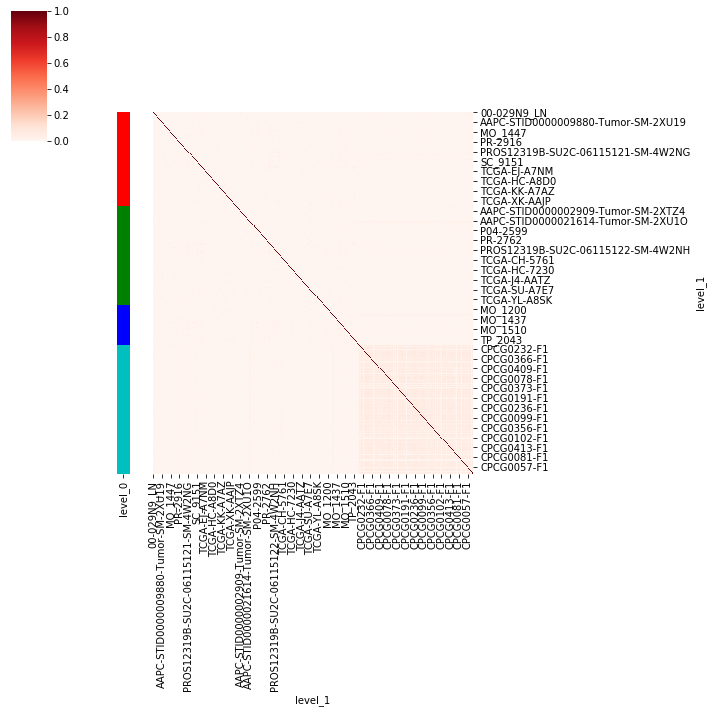

In [43]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

linkage = hc.linkage(sp.distance.squareform(dists), method='average')
plt.figure(figsize=(10,10))
sns.clustermap(1-dists_df, row_linkage=linkage, row_colors=row_colors,  col_linkage=linkage,  cmap='Reds', row_cluster=False, col_cluster=False)
saving_dir= join(PLOTS_PATH, 'reviews/1-common_samples')
plt.savefig(join(saving_dir, 'distance.png'))